# Exploratory Data Analysis

## Preparing the environment

In [9]:
# Import Python libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
# Import user-defined modules
SRC_DIR = Path.cwd().parent / "src"
sys.path.append(str(SRC_DIR))

import data_utils

# Set global variables
RAW_DATA_DIR, PROCESSED_DATA_DIR = data_utils.get_data_directories()

Data directories successfully set.


## Looking at the Data

We can see here that there are several fields that corresponds to the features, label (exam score), and unique identifier (student ID). Looking further, there seems to be fourteen features and one label. The data types of the features vary but there are categorical (object) features representing nominal data and numerical (int64 and float64) values representing ordinal and continuous/discrete numerical data.

In [11]:
# Load dataset
df = pd.read_excel(f"{RAW_DATA_DIR}/student_habits_performance.xlsx", sheet_name='in')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [12]:
df.info()  # Data types, non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

The unique identifier student_id doesn't hold any information that would be relevant in training models or even visualizing data, so let's remove it.

In [13]:
df.drop(columns=['student_id'], inplace=True)

Let's describe our numerical features, we can see that there are no missing values. The mean, standard deviation, minimum, maximum, and quartile values are presented here. We can see that there are students who do not exercise, while the average mental health rating is 5.44, and the mean score of the students is barely passing at 69.60 points. Several information can be derived from here.

## Describing the Data Deeper

In [14]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Let us then describe our categorical data, we can see that there is a something important going on here i.e. there seems to be missing data in the parental education level field. Does this mean that these really are missing data? The data analysts deem that these are wronlgy parsed. `None` value doesn't mean that the data is missing every time, it might mean that the parent of those students didn't have any educational background. Removing these may hurt inclusivity and fairness of the analysis.

In [7]:
df.describe(include=['object'])

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,909,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,392,447,682


In [15]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'gender':
['Female' 'Male' 'Other']

Unique values in 'part_time_job':
['No' 'Yes']

Unique values in 'diet_quality':
['Fair' 'Good' 'Poor']

Unique values in 'parental_education_level':
['Master' 'High School' 'Bachelor' nan]

Unique values in 'internet_quality':
['Average' 'Poor' 'Good']

Unique values in 'extracurricular_participation':
['Yes' 'No']



And so we filled the `None` values with `No education`.

## Imputing Missing Values

In [9]:
# Treat nan for parental education level to not graduating in high school, with bachelors, or with masters.
df["parental_education_level"] = df["parental_education_level"].fillna("No education")
df["parental_education_level"].unique()

array(['Master', 'High School', 'Bachelor', 'No education'], dtype=object)

It is also obvious that there is a field that we can combine i.e. the time a student spends on social media and the time a student spends on Netflix. This can be summed to a new field called `total_screen_time`, with that, we can drop the columns that we combined.

## Combining a Feature

In [16]:
# Feature engineering: combine screen time metrics
df["total_screen_time"] = df["social_media_hours"] + df["netflix_hours"]
df.drop(columns=["social_media_hours", "netflix_hours"], inplace=True)

In [17]:
df.head()

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time
0,23,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3
1,20,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1
2,21,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4
3,23,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9
4,19,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9


We will be saving this dataset to a new CSV file and call it `cleaned_dataset`.

In [18]:
data_utils.save_dataset_to_csv(df, "cleaned_dataset")

Data directories successfully set.
Dataset saved in /home/asimov/Projects/lifestyle_learning/data/preprocessed


## Detecting Outliers
We can see here that there are a few outliers. Identifying the prevalence of outliers is critical for preparing the data for training as some scaling transformations are susceptible with these outliers. In our case, there isn't much outliers to be really mindful of this.

In [25]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                    'parental_education_level', 'internet_quality',
                    'extracurricular_participation']
numeric_cols = ['study_hours_per_day', 'attendance_percentage',
                  'sleep_hours', 'exercise_frequency', 'mental_health_rating',
                  'exam_score', 'total_screen_time',]

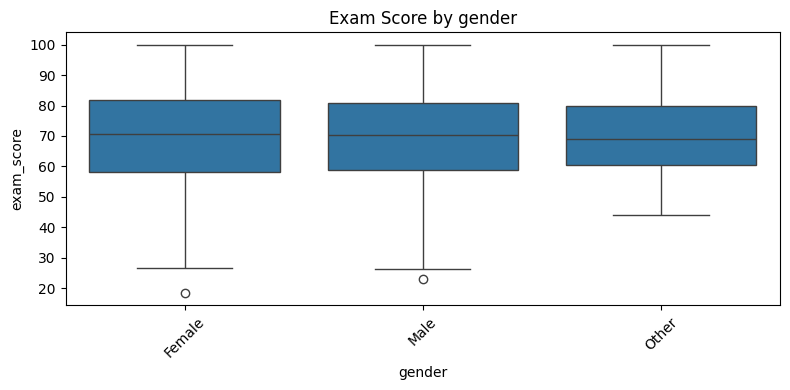

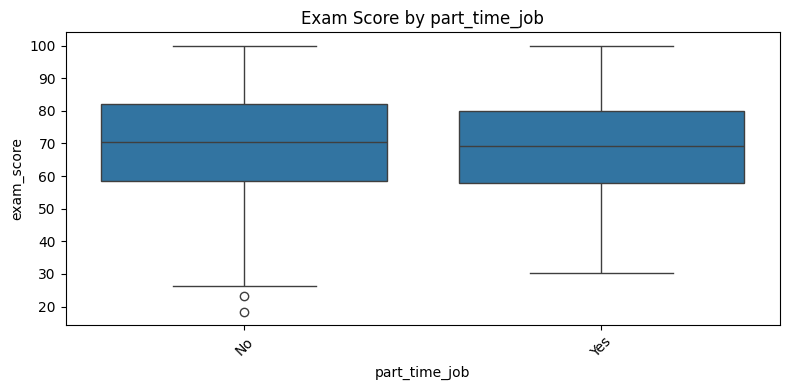

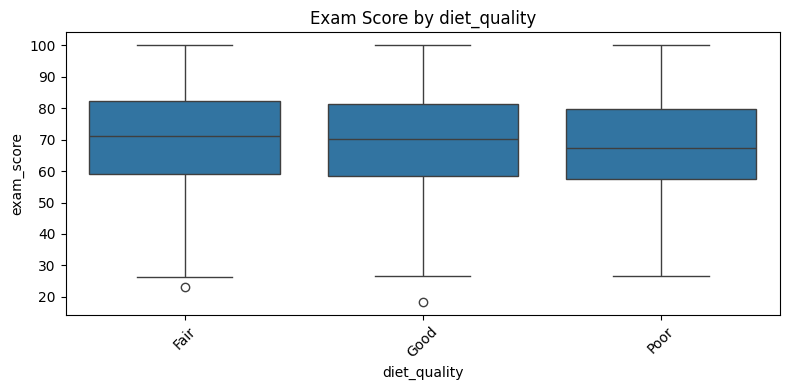

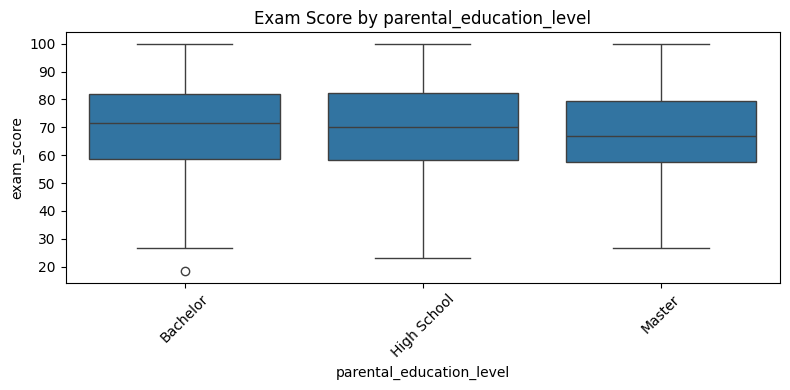

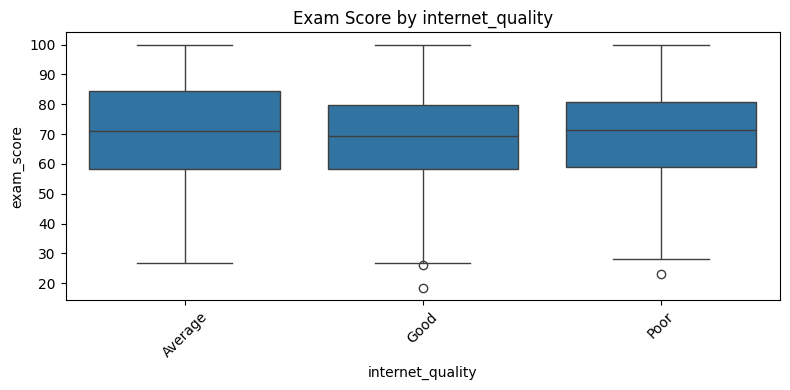

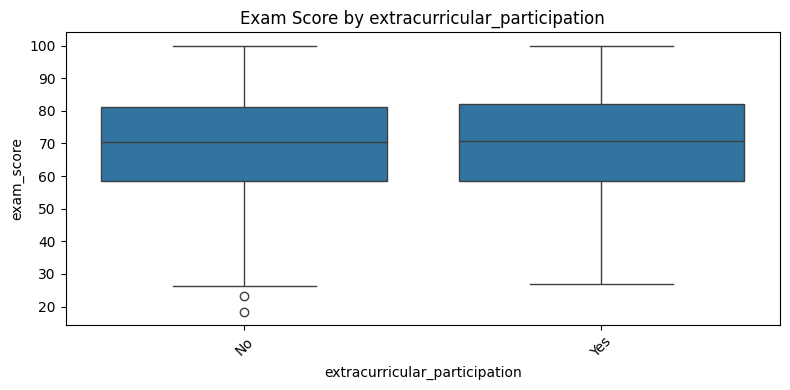

In [26]:
for col in categorical_cols:
    df[col] = df[col].astype('category')
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='exam_score', data=df)
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Study Habits to Exam Score

We can see that there is only one apparent trend here, that the students who spends more time studying ends up having a better score. We can also see the distribution of these columns i.e. they are almost normal, so we can use standard scaler here.

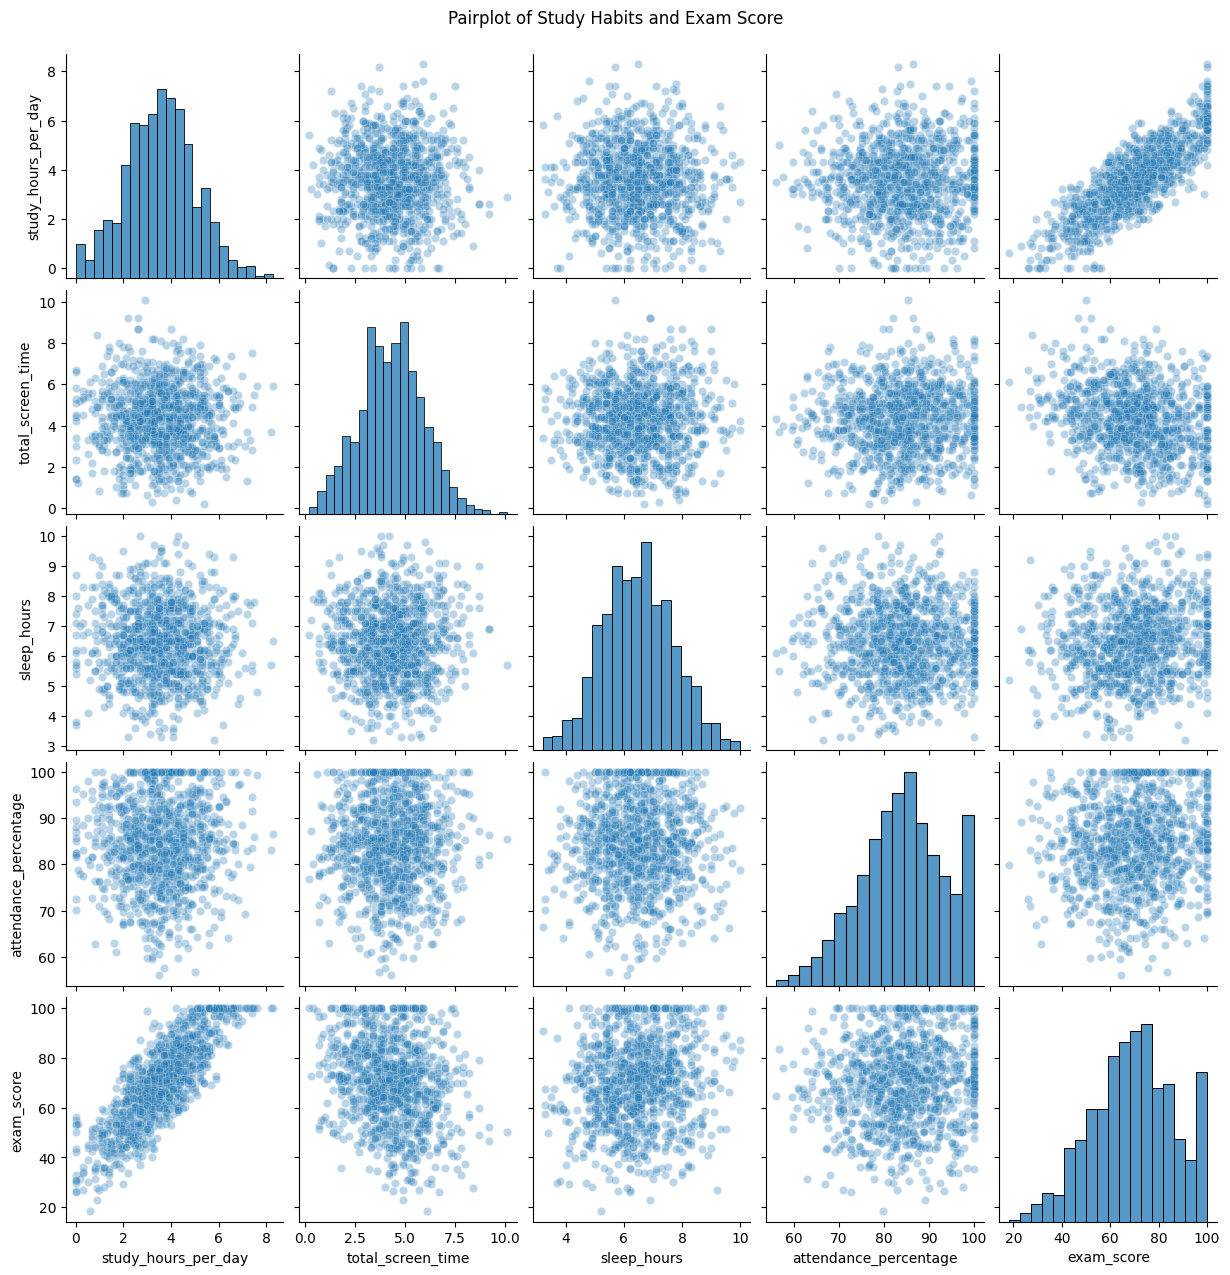

In [35]:
sns.pairplot(
    df[['study_hours_per_day', 'total_screen_time', 'sleep_hours', 'attendance_percentage', 'exam_score']],
    kind='scatter',
    plot_kws={'alpha': 0.3}
)
plt.suptitle("Pairplot of Study Habits and Exam Score", y=1.02)
plt.show()

## Avoiding Multicollinearity

It's best to avoid multicollinearity in our model which leads to model instability and unreliability. As we can see, there are no two features that are highly collinear with other features.

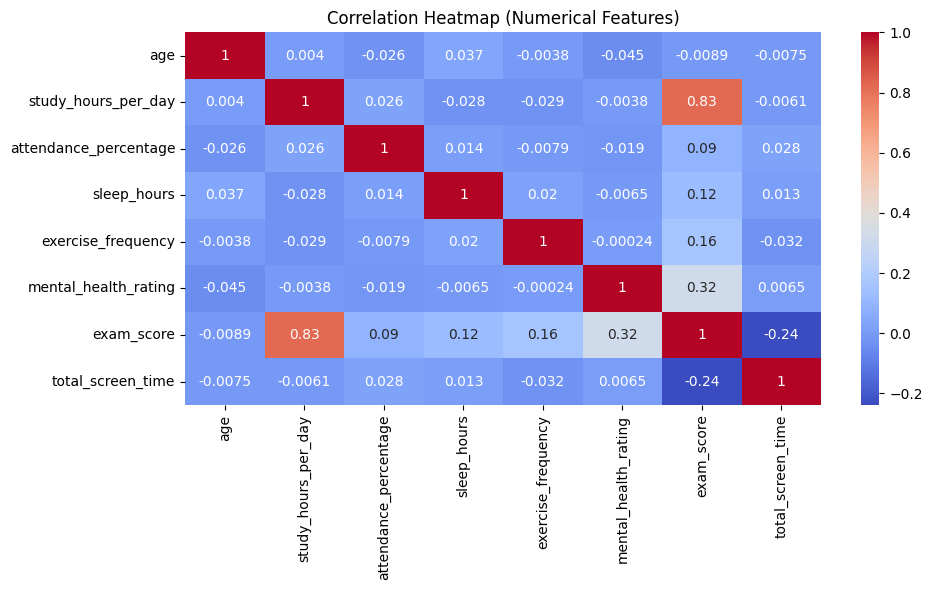

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()